# **Wine Quality EDA**

## **Importing necessary libraries and data**

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

In [97]:
#red wine table
rwine_data = pd.read_csv('winequality-red 2.csv')
rwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [98]:
#white wine table
wwine_data = pd.read_csv('winequality-white 2.csv')
wwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## **Exploratory Data Analysis**

### Red Wine's information and description of its dataframe:

In [99]:
#running info on rwine_data
rwine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [100]:
#running describe on rwine_data
rwine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Creating a histogram and box plot for Red Wine Data

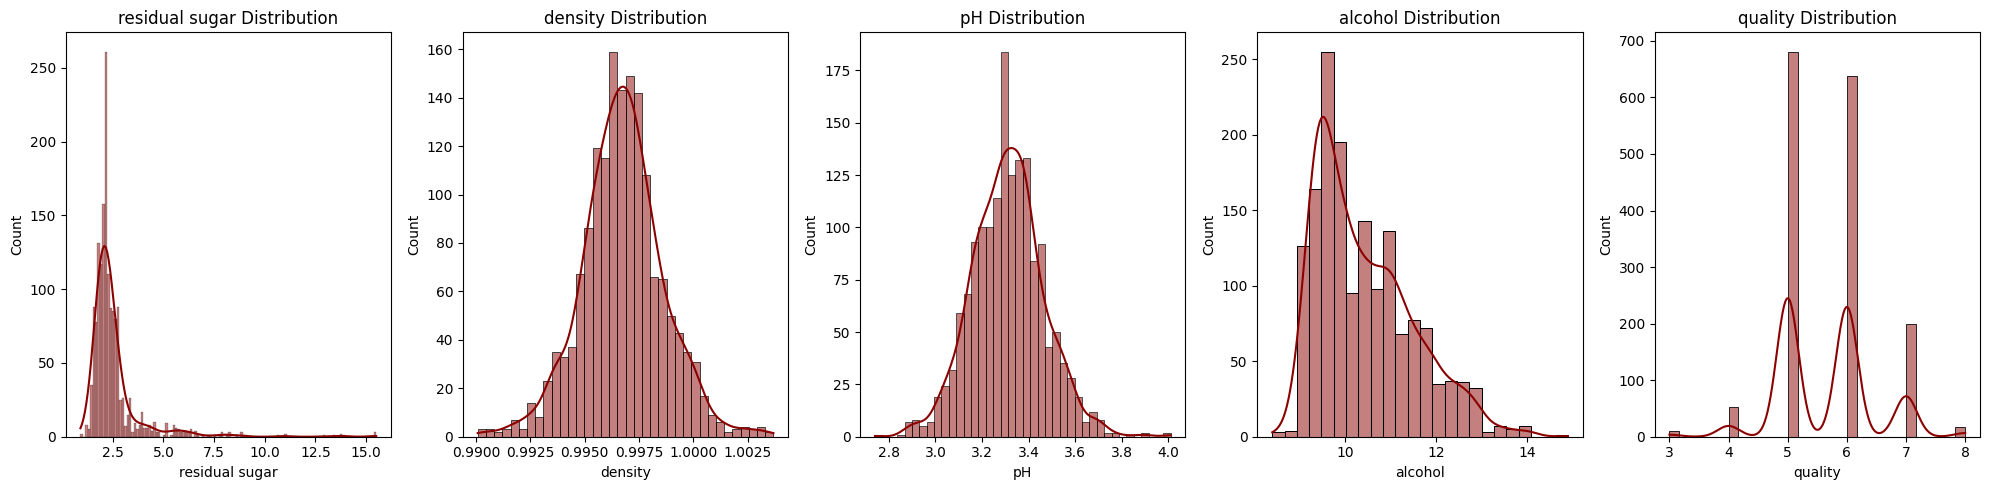

In [101]:
selected_columns = ['residual sugar', 'density', 'pH', 'alcohol', 'quality']

f, ax = plt.subplots(1, len(selected_columns), figsize=(20, 5))

for i, col in enumerate(selected_columns):
    sns.histplot(data=rwine_data, x=col, kde=True, color='darkred', ax=ax[i])
    ax[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


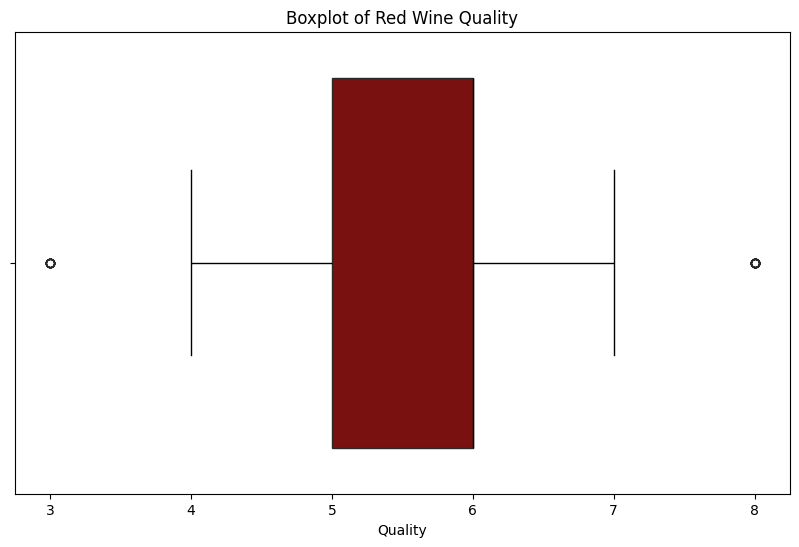

In [102]:
#creating a boxplot for quality in Red Wine

plt.figure(figsize=(10, 6))
x = rwine_data['quality']
bx = sns.boxplot(x, orient='h', color = 'darkred')
for line in bx.lines:
    line.set_color('k')
plt.xlabel('Quality')
plt.title('Boxplot of Red Wine Quality')
plt.show()

### White Wine's information and description of its dataframe:

In [103]:
#looking at some info of the dataframe
wwine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [104]:
#running describe on wwine_data
wwine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Creating a histogram and box plot for White Wine Data

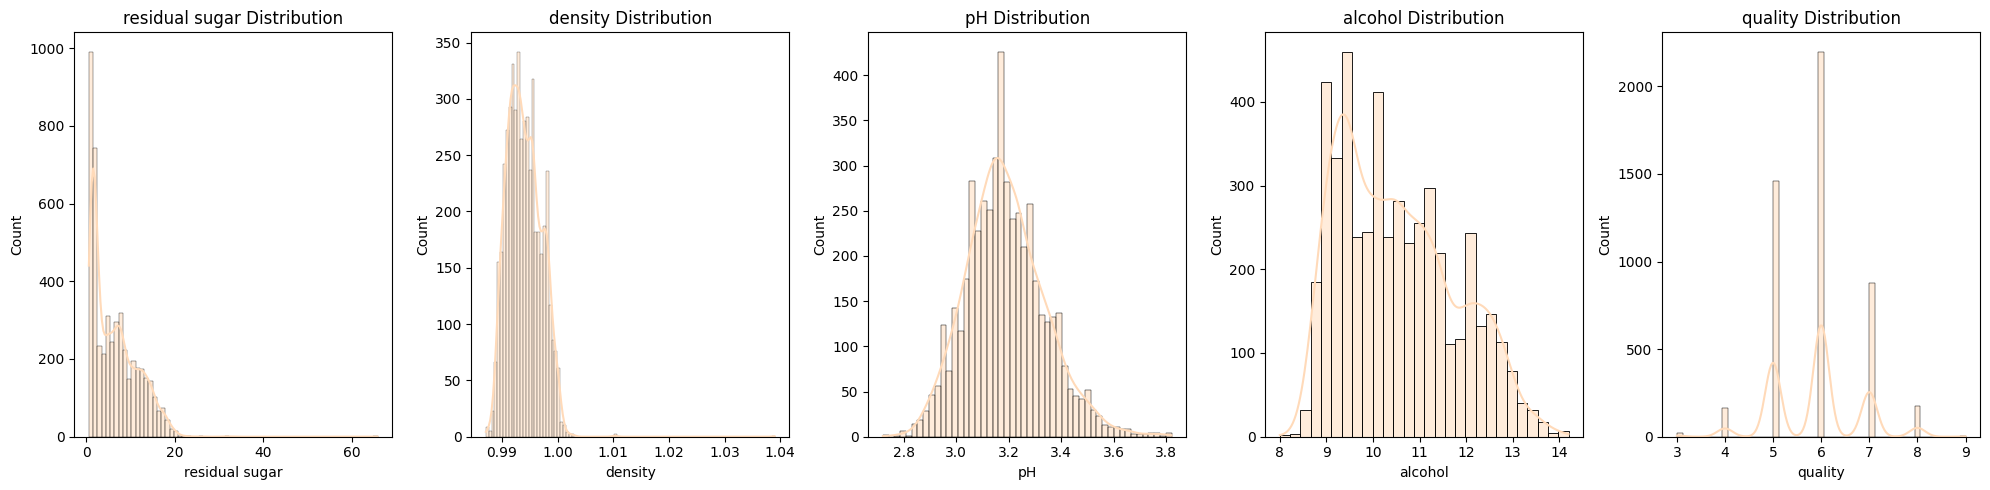

In [105]:
selected_columns = ['residual sugar', 'density', 'pH', 'alcohol', 'quality']

f, ax = plt.subplots(1, len(selected_columns), figsize=(20, 5))

for i, col in enumerate(selected_columns):
    sns.histplot(data=wwine_data, x=col, kde=True, color='peachpuff', ax=ax[i])
    ax[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


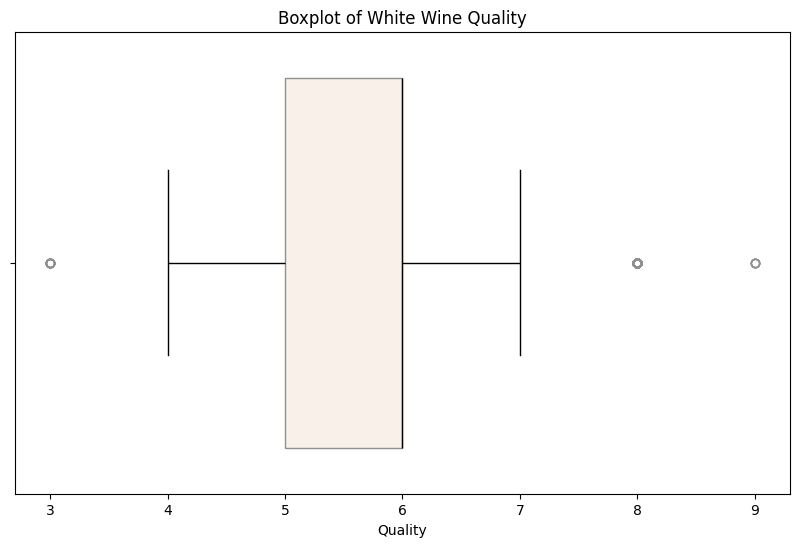

In [106]:
#creating a boxplot for White Wine quality
plt.figure(figsize=(10, 6))
x = wwine_data['quality']
bp = sns.boxplot(x, orient='h', color = 'linen')   
for line in bp.lines:
    line.set_color('k')
plt.xlabel('Quality')
plt.title('Boxplot of White Wine Quality')
plt.show()

## **Hypothesis Formulation**

**There is a correlation between residual sugar and density in white wine.** </br>
I came up with this hypothesis based heavily on the correlation matrix for the white wine. I decided to look into this because the correlation score on the matrix is very close to one. </br>
**The wine quality is greater the more alcohol content is in the wine for both red and white wine.** </br>
This hypothesis is based on both the box plot and the correlation matrix. The correlation score for both red wine and white wine for alcohol content and quality is about 48% and 44% respectively. The box plot shows the average of the alcohol for both red wine and white wine to be about 10.5 and the quality in the description analysis to be about 5.6 for red wine and 5.8 for white wine.

## **Hypothesis Testing**

### Testing first Hypothesis

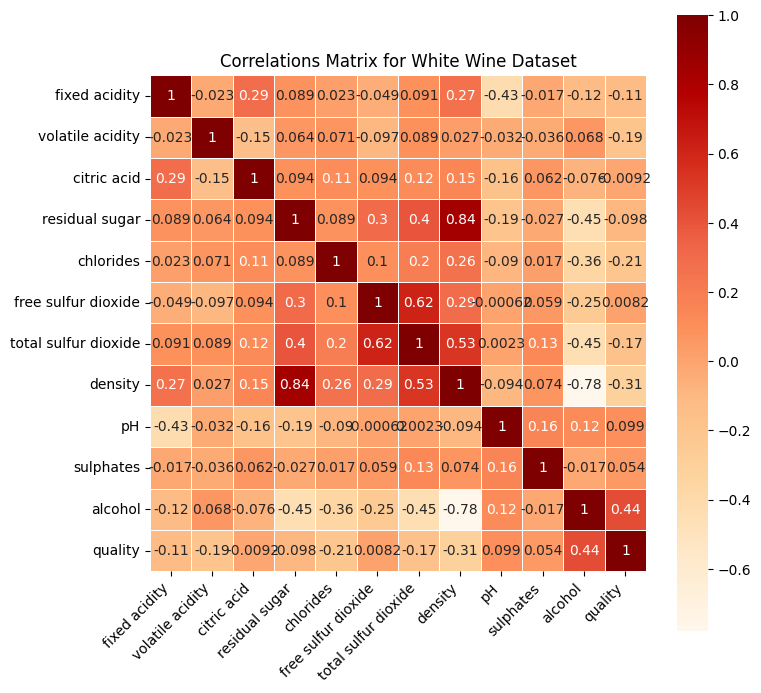

In [107]:
#creating a correlation matrix for White Wine and its features
cor_numVar = wwine_data.corr(method='pearson')


# Plotting the correlation matrix
plt.figure(figsize=(8, 8))
corrplot = sns.heatmap(cor_numVar, annot=True, cmap='OrRd', square=True, linewidths=0.5, linecolor='white')
corrplot.set_xticklabels(corrplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlations Matrix for White Wine Dataset')
plt.show()

### Testing second Hypothesis (Red Wine)

In [114]:
from sklearn.model_selection import train_test_split

X = rwine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']] # feature of the data
y = rwine_data['quality'] # target variable

X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.2,random_state=0)

# Further splitting the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

# Creating and training the model
model = RandomForestRegressor(random_state = 0)
model.fit(X_train, y_train)

# Evaluating the model on the validation set
validation_score = model.score(X_val, y_val)
print('The model score on the validation set (R^2) is:', validation_score)

# Evaluating the model on the test set
test_score = model.score(X_test, y_test)
print('The model score on the test set (R^2) is:', test_score)

# Creating a new role for prediction
new_row_values = {
    'fixed acidity': 8.319637,
    'volatile acidity': .527821,
    'citric acid': .270976,
    'residual sugar': 2.538806,
    'chlorides': .087467,
    'free sulfur dioxide': 15.874922,
    'total sulfur dioxide': 46.467792,
    'density': .996747,
    'pH': 3.311113,
    'sulphates': .658149,
    'alcohol': 16
}

new_row_rw = pd.DataFrame([new_row_values])

# Use the trained model to make predictions
prediction = model.predict(new_row_rw)
print('The model predicts:', prediction)

from sklearn.metrics import mean_squared_error, mean_absolute_error

validation_predictions = model.predict(X_val)

# Calculating Mean Squared Error on the validation set
mse_validation = mean_squared_error(y_val, validation_predictions)
print('Mean Squared Error on the validation set:', mse_validation)

# Calculating Mean Absolute Error on the validation set
mae_validation = mean_absolute_error(y_val, validation_predictions)
print('Mean Absolute Error on the validation set:', mae_validation)

The model score on the validation set (R^2) is: 0.4784602026049204
The model score on the test set (R^2) is: 0.2161512820512821
The model predicts: [6.2]
Mean Squared Error on the validation set: 0.28594921875
Mean Absolute Error on the validation set: 0.39835937499999996


### Testing second Hypothesis (White Wine)

In [117]:
from sklearn.model_selection import train_test_split

X = wwine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']] # feature of the data
y = wwine_data['quality'] # target variable

X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.2,random_state=0)

# Further splitting the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

# Creating and training the model
model = RandomForestRegressor(random_state = 0)
model.fit(X_train, y_train)

# Evaluating the model on the validation set
validation_score = model.score(X_val, y_val)
print('The model score on the validation set (R^2) is:', validation_score)

# Evaluating the model on the test set
test_score = model.score(X_test, y_test)
print('The model score on the test set (R^2) is:', test_score)

# Creating a new role for prediction
new_row_values = {
    'fixed acidity': 6.854788,
    'volatile acidity': .278241,
    'citric acid': .334192,
    'residual sugar': 6.391415,
    'chlorides': .045772,
    'free sulfur dioxide': 35.308085,
    'total sulfur dioxide': 138.360657,
    'density': .994027,
    'pH': 3.188267,
    'sulphates': .489847,
    'alcohol': 16
}

new_row_ww = pd.DataFrame([new_row_values])

# Use the trained model to make predictions
prediction = model.predict(new_row_ww)
print('The model predicts:', prediction)

from sklearn.metrics import mean_squared_error, mean_absolute_error

validation_predictions = model.predict(X_val)

# Calculating Mean Squared Error on the validation set
mse_validation = mean_squared_error(y_val, validation_predictions)
print('Mean Squared Error on the validation set:', mse_validation)

# Calculating Mean Absolute Error on the validation set
mae_validation = mean_absolute_error(y_val, validation_predictions)
print('Mean Absolute Error on the validation set:', mae_validation)


The model score on the validation set (R^2) is: 0.4807250293136105
The model score on the test set (R^2) is: 0.38777261904761895
The model predicts: [6.81]
Mean Squared Error on the validation set: 0.4589605867346939
Mean Absolute Error on the validation set: 0.4849617346938776
